# TOC
1. Prep & Import
2. Create a histogram  
3. Create a bar chart  
4. Create a line chart  
5. Create a sample dataframe  
6. Investigate if there's a tie between age and dependents   
7. Plot income by age   
8. Export visualizations  

## Prep

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing data
path = r'C:\Users\Ryzen RGB Madness!!!\Instacart Basket Analysis'

In [3]:
insta_complete = pd.read_pickle(os.path.join(path, '02 Data', 'Cleaned', 'instacart_complete.pkl'))

In [4]:
# Verifying import
insta_complete.shape

(32404859, 29)

In [5]:
insta_complete.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spender_type,frequency,freq_flag,gender,state,age,date_joined,family_members,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


## Task

#### 4.9B.3 - Histogram

Text(0.5, 1.0, 'Orders by Hour of Day')

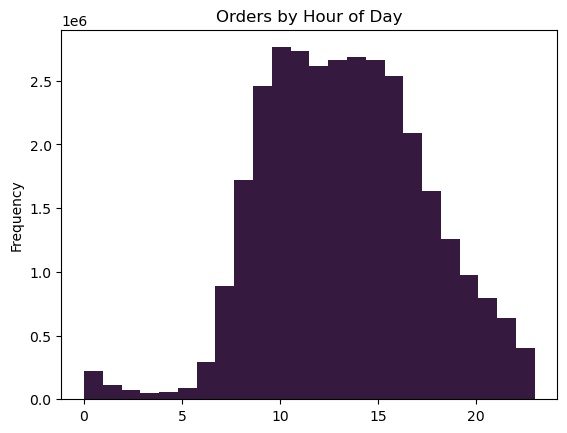

In [43]:
# Creating histogram
sns.set_palette('rocket')
hist = insta_complete['order_hour_of_day'].plot.hist(bins=24)

hist.set_title('Orders by Hour of Day')

The histogram of orders by hour of the day shows that most people are putting in their Instacart orders between 10 AM and 3 PM. This tracks with the likelihood of people doing this over their lunch hour, or as they're thinking about what they want to do for dinner that evening. 

#### 4.9B.4 - Bar Chart

Text(0.5, 1.0, 'Loyalty Flag')

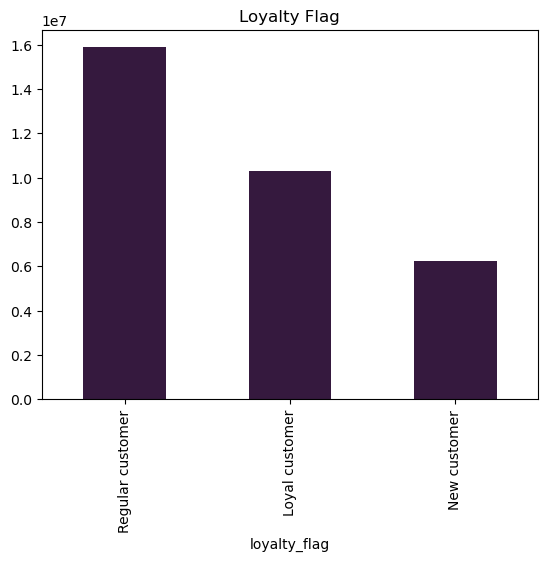

In [44]:
# Creating the bar chart
sns.set_palette('rocket')
bar = insta_complete['loyalty_flag'].value_counts().plot.bar()

bar.set_title('Loyalty Flag')

#### 4.9B.5 - Expenditure By Hour

In [13]:
# Creating sample data for line chart
np.random.seed(4)
dev = np.random.rand(len(insta_complete)) <= 0.7

In [14]:
# Setting big sample
big = insta_complete[dev]

In [15]:
# Setting small sample
small = insta_complete[~dev]

In [16]:
# Creating dataframe for line chart from small sample
df_2 = small[['order_hour_of_day', 'prices']]

Text(0.5, 1.0, 'Prices by Hour of Day Ordered')

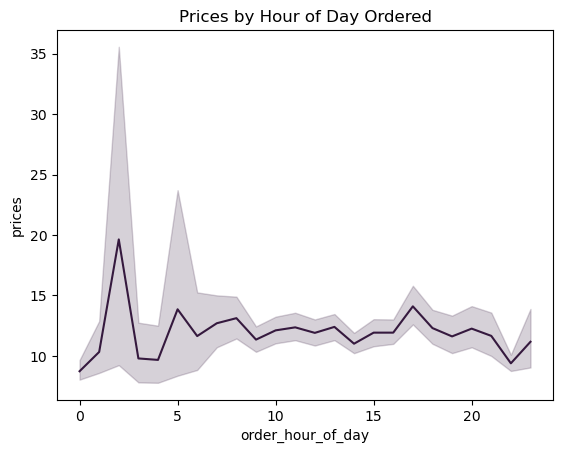

In [45]:
# Creating line chart
sns.set_palette('rocket')
line = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')

line.set_title('Prices by Hour of Day Ordered')

In [18]:
# Creating dataframe from big sample to verify sample data in small
df_3 = big[['order_hour_of_day','prices']]

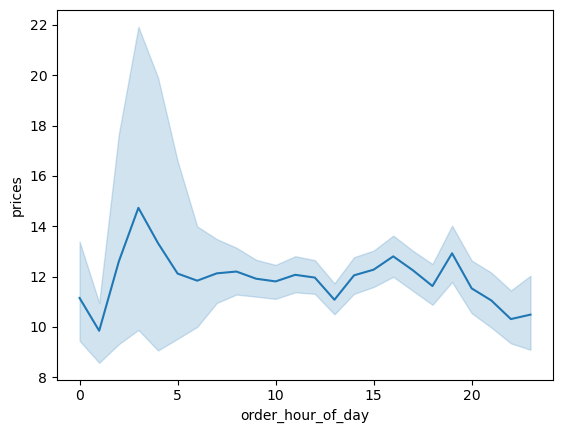

In [19]:
#Verifying line chart data 
line_chk = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

The GENERAL shape is the same, though the line chart from the small data sample is showing some more hourly detail that isn't showing in the big data sample's line chart. 

#### 4.9B.6 - Dependents & Age

In [30]:
# Creating dataframe from small data sample to create line chart
df_4 = small[['age', 'family_members']]

Text(0.5, 1.0, 'Family Members and Age')

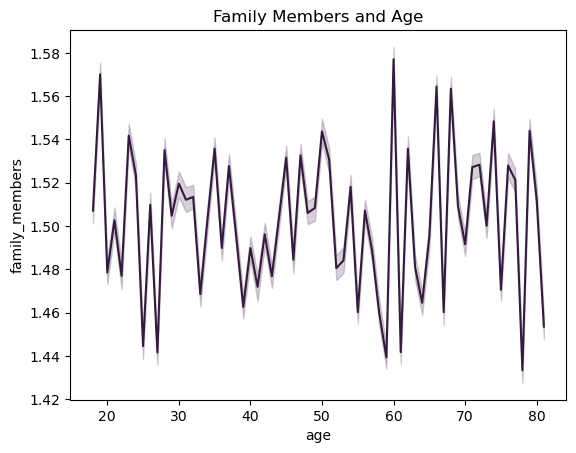

In [46]:
# Plotting age & dependents
sns.set_palette('rocket')
line2 = sns.lineplot(data=df_4, x='age', y='family_members')

line2.set_title('Family Members and Age')

Going off this, there's no correlation between the number of family members and the age of instacart customers. 

STUDENT NOTE: What I don't understand is why it's only showing this range. The family_members field is from 0-3. There are certainly customers who have three dependents (I verified the value counts). I thought maybe something was wrong with how it was calculating the y-axis, so I learned how to set the y axis min, max, and tick marks - that worked, but then it was still just a small line between 1.44 and 1.58. 

#### 4.9B.7 - Age & Income Scatterplot

In [37]:
# Creating dataframe from small data sample to create scatterplot
df_5 = small[['age', 'income']]

Text(0.5, 1.0, 'Income by Age')

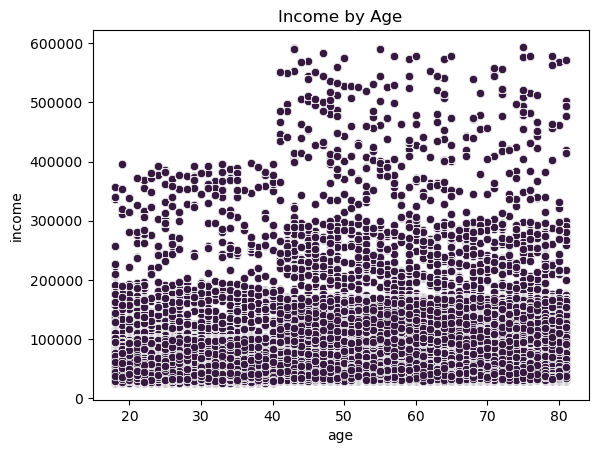

In [47]:
# Creating scatterplot of age & income
sns.set_palette('rocket')
scatter = sns.scatterplot(x='age', y='income', data=df_5)

scatter.set_title('Income by Age')

As customers get older - and presumably, progress in their careers and their children grow up and leave home - their spending power increases at the top end (note the jump from 400k to 600k in the 40s), but the majority of instacart's customers are still in the bottom two tiers of income, under 200,000. 

While the current trend is to chase the big bucks and increasingly price lower wage earners out of the market (see: automobiles and the death of the small, affordable car, as well as the housing market and the death of the starter home), given Instacart's service provided, continuing to market toward those that make up the majority of your income-earning customers ensures a stable customer base that will persist through the years. 

## Exporting Visualizations

In [48]:
# Saving histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'final_histogram.png'))

In [49]:
# Saving bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'final_bar.png'))

In [50]:
# Saving prices line chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'final_line.png'))

In [51]:
# Saving age line chart
line2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'final_line2.png'))

In [52]:
# Saving scatterplot
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'final_scatter.png'))